<a href="https://colab.research.google.com/github/elspyc/clases-de-python/blob/main/redneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [10]:
#descargar set de datos 
datos, metados = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
#nombres sets, descargar info

In [13]:
metados

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

In [15]:
datos_entrenamiento, datos_pruebas = datos['train'], datos ['test']

In [16]:
#obtenemos los datos de salida / categorias 
nombres_clases = metados.features['label'].names

In [17]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
#normalizar datos 
def normalizar (imagenes,etiquetas):
   imagenes= tf.cast(imagenes,tf.float32)
   imagenes/=255
   return imagenes,etiquetas


datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#agregar datos 
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [62]:
#mostrar una imagen de los datos de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt 
#graficar imagen
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

ValueError: ignored

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta)in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.inshow(imagen,cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [60]:
modelo = tf.keras.Sequential([
    #definimos capa de entrada y le decimos que nuestros datos de entrada estan 
    #en forma dee 28x28 y en 1 canal(blanco y negro)
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    
    
    #agregar dos capas ocultas con 50 neuronas cada una, y todas con la funcion RELU
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ])


In [37]:
#compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [38]:
#separar las variables y cantidad de ejemplos 
num_ej_entrenamiento = metados.splits['train'].num_examples
num_ej_pruebas = metados.splits['test'].num_examples

In [39]:
#verificar la asignacion
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [40]:
#separamos por lotes para optimizar el entrenamiento 
tamaño_lote = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(tamaño_lote)
datos_pruebas = datos_pruebas.batch(tamaño_lote)

In [44]:
#Entrenar nuestra red
import math
historial=modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/tamaño_lote))

Epoch 1/5
1875/1875 [==============================] - 16s 3ms/step - loss: 0.5227 - accuracy: 0.8171
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3899 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3521 - accuracy: 0.8731
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3277 - accuracy: 0.8805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3107 - accuracy: 0.8857


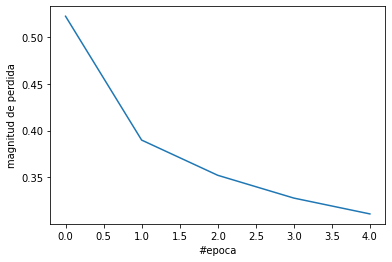

In [59]:
#graficar la perdida por vuelta
plt.xlabel("#epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 159ms/step


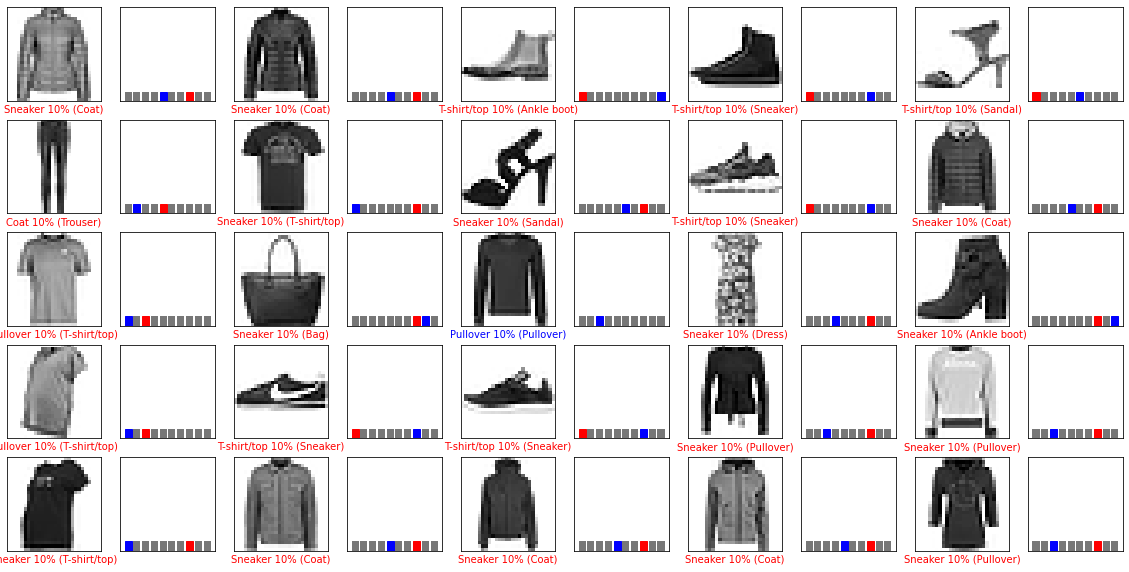

In [64]:
#analisar los datos de prueba 
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)